In [3]:
import pandas as pd
from joblib import dump
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cleaned_dataset = pd.read_csv('../preparation/dataframes/cleaned_dataset.csv')
X = cleaned_dataset[[
    'round', 'home_scored_sofar', 'away_scored_sofar', 'home_conceeded_sofar', 'away_conceeded_sofar',
    'home_points_sofar', 'away_points_sofar', 'elo_home', 'elo_away', 'home_form', 'away_form']]
y = cleaned_dataset['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [6]:
k_range = range(1, 100)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test, y_pred))


Text(0, 0.5, 'Testing Accuracy')

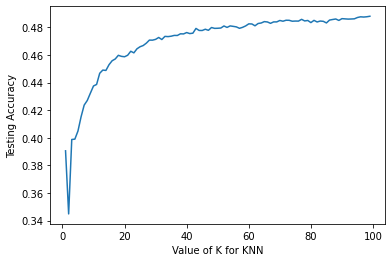

In [7]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')